##### Data : https://www.kaggle.com/datasets/mssmartypants/rice-type-classification

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import pickle as pkl

In [2]:
df = pd.read_csv('riceClassification.csv')

In [3]:
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [5]:
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


<AxesSubplot:>

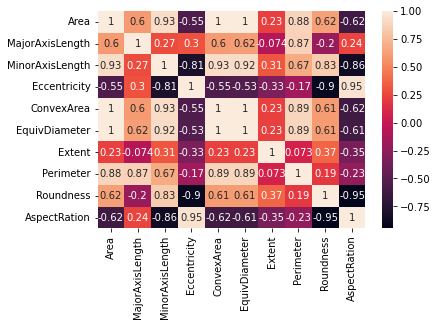

In [10]:
sns.heatmap(df.drop(['id','Class'], axis = 1).corr(), annot = True)

In [7]:
x = df.drop(['id', 'Class'], axis = 1)
y = df['Class']

In [8]:
scaler = StandardScaler()

In [22]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.70363043, -4.80374424,  0.41792669, ..., -2.66177825,
         0.83958835, -2.66379989],
       [-2.83847845, -6.22078914, -0.83561103, ..., -4.85731791,
         1.83721534, -2.6354184 ],
       [-2.71851854, -6.09140363, -0.77169963, ..., -4.79985991,
         2.3835873 , -2.60595002],
       ...,
       [-0.45768318,  0.25018706, -0.6857677 , ..., -0.31708508,
        -0.37389933,  0.75045135],
       [-0.73372729, -0.02285299, -0.82824173, ..., -0.27918653,
        -1.08116545,  0.7868348 ],
       [-0.61513056,  0.11322075, -0.81671191, ..., -0.44047571,
        -0.53075529,  0.84669604]])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [24]:
model = LogisticRegression().fit(x_train, y_train)

In [25]:
y_pred = model.predict(x_test)

In [26]:
accuracy_score(y_test, y_pred)

0.9903766840802859

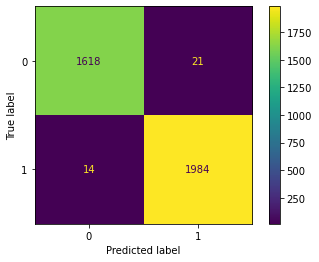

In [28]:
plot_confusion_matrix(model, x_test, y_test)

In [30]:
pkl.dump(model, open('lr_rice.pkl', 'wb'))